In [1]:
#Arca Continental, Data Translator Case by Dylan Carreón Martínez
import pandas as pd
import matplotlib.pyplot as plt

Arca_df = pd.read_csv("C:\\Users\\max80\\OneDrive\\Documents\\Data Translator Case Arca Continental\\sampleData.csv", header=0) #Creation of a data frame
#using the path on my computer, to run all the cells you need to change it

In [2]:
NaN = Arca_df.isna()
NaNxcol = NaN.sum()
display(NaNxcol) #Check for NaN values in the dataframe to delete it, the data sample don't haved

order_date               0
customer                 0
productAgrupationID      0
productID                0
territory                0
product_cases_ordered    0
dtype: int64

**1. identify the top five customers who placed the most orders in January**

In [3]:
orders_clients = Arca_df.groupby('customer')['product_cases_ordered'].sum().reset_index() #Groupby with customer data and the total product cases ordered for each
orders_clients = orders_clients.sort_values(by = 'product_cases_ordered', ascending = False)
print("The top 5 customers with the most orders are shown in the following table:")
display(orders_clients.head(5))

The top 5 customers with the most orders are shown in the following table:


,customer,product_cases_ordered
58,247474,37792.208
86,488882,35826.100
28,215932,30155.046
27,214634,28881.493
45,235365,28729.988


**2. Determine the most popular productAgrupationID based on the total number of cases ordered.**

In [4]:
Agrup_cases = Arca_df.groupby('productAgrupationID')['product_cases_ordered'].sum().reset_index() #Groupby with the producAgrupationID data and the total product cases ordered of each
Agrup_cases = Agrup_cases.sort_values(by = 'product_cases_ordered', ascending = False)
print("The most popular producAgrupationID is:")
display(Agrup_cases.head(1))

The most popular producAgrupationID is:


,productAgrupationID,product_cases_ordered
37,1121.0,85874.702


**3. Identify the most ordered product ID of each productAgrupationID**

In [5]:
Product_agrup = Arca_df.groupby(['productAgrupationID', 'productID']).agg({'product_cases_ordered': 'sum'}).reset_index()
#Groupby with the data of the productAgrupationID and the productID columns and the total product cases ordered of each
Product_max = Product_agrup.groupby('productAgrupationID')['product_cases_ordered'].idxmax() #Data frame with the best sellers products
Product_agrup = Product_agrup.loc[Product_max].reset_index() #Filter the best sellers products by productAgrupationID
del Product_agrup['index']

print("The following table contains the most popular product for each producAgrupationID:")
pd.set_option('display.max_rows', None)
display(Product_agrup)

The following table contains the most popular product for each producAgrupationID:


,productAgrupationID,productID,product_cases_ordered
0,1021.0,3996,3301.360
1,1023.0,4205,1853.880
2,1025.0,4163,115.040
3,1027.0,4341,1467.907
4,1037.0,1297,16433.452
5,1039.0,1302,9158.197
6,1042.0,5793,405.640
7,1044.0,2636,560.357
8,1047.0,2909,5545.870
9,1048.0,1198,6671.276


**4. How does the sales volume vary across different territories?**

In [6]:
territories_orders = Arca_df.groupby('territory')['product_cases_ordered'].sum().reset_index()
#Groupby with the territory Data and the total product cases ordered for each
territories_orders = territories_orders.sort_values(by = 'product_cases_ordered', ascending = False).reset_index()
del territories_orders['index']

print("The following table contains the total product cases ordered and the representative percentage for each territory:")
display(territories_orders)

The following table contains the total product cases ordered and the representative percentage for each territory:


,territory,product_cases_ordered
0,263,663776.517
1,252,350462.938
2,245,169374.821
3,279,136120.397
4,262,113963.111
5,246,106936.338
6,250,85315.777
7,316,81528.564
8,301,58783.530
9,289,45497.749


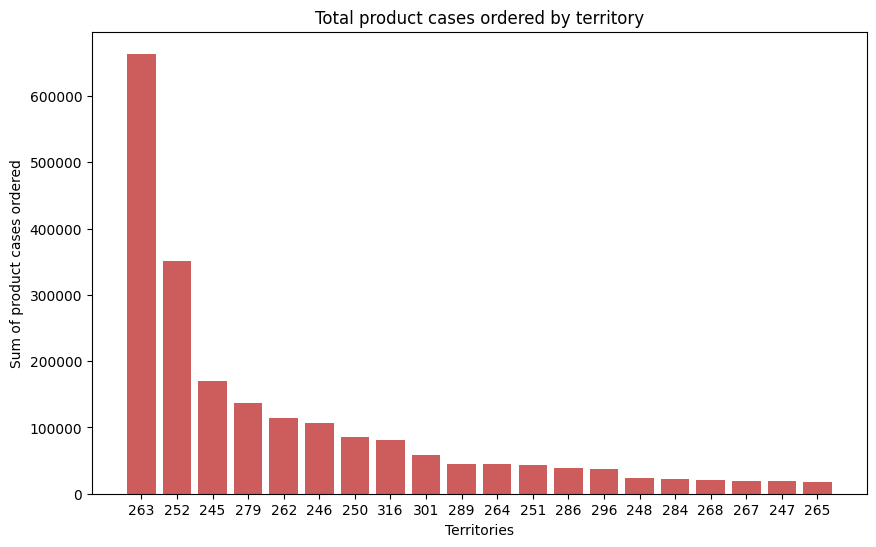

looking this bar chart It is assume that the data follows a Pareto's Law


In [7]:
territories_orders['territory'] = territories_orders['territory'].astype(str) #change the data type for territory column
#Plot a bar chart of total product cases ordered by territory
plt.figure(figsize=(10, 6))
plt.bar(territories_orders['territory'], territories_orders['product_cases_ordered'], color='indianred')
plt.xlabel('Territories')
plt.ylabel('Sum of product cases ordered')
plt.title('Total product cases ordered by territory')
plt.show()
print("looking this bar chart It is assume that the data follows a Pareto's Law")

In [8]:
#Pareto clasification function, divides the data in three categories
def pareto_ABC(row):
  if row['Cumulative % of total product ordered'] <= 80:
    return 'A'
  elif row['Cumulative % of total product ordered'] <= 95:
    return 'B'
  else:
    return 'C'

#Creation of a data frame with the cumulative % for a Pareto classification
pareto_territory = territories_orders
pareto_territory['Cumulative % of total product ordered'] = (territories_orders['product_cases_ordered'].cumsum()/territories_orders['product_cases_ordered'].sum())*100
pareto_territory['Pareto Classification'] = territories_orders.apply(pareto_ABC, axis = 1)
display(pareto_territory)
print('This chart suggests that: the 25% of territories mae the 70% of the product cases orders')

,territory,product_cases_ordered,Cumulative % of total product ordered,Pareto Classification
0,263,663776.517,31.631558,A
1,252,350462.938,48.332494,A
2,245,169374.821,56.403869,A
3,279,136120.397,62.890541,A
4,262,113963.111,68.321331,A
5,246,106936.338,73.417267,A
6,250,85315.777,77.482899,A
7,316,81528.564,81.368056,B
8,301,58783.530,84.169322,B
9,289,45497.749,86.337468,B


This chart suggests that: the 25% of territories mae the 70% of the product cases orders


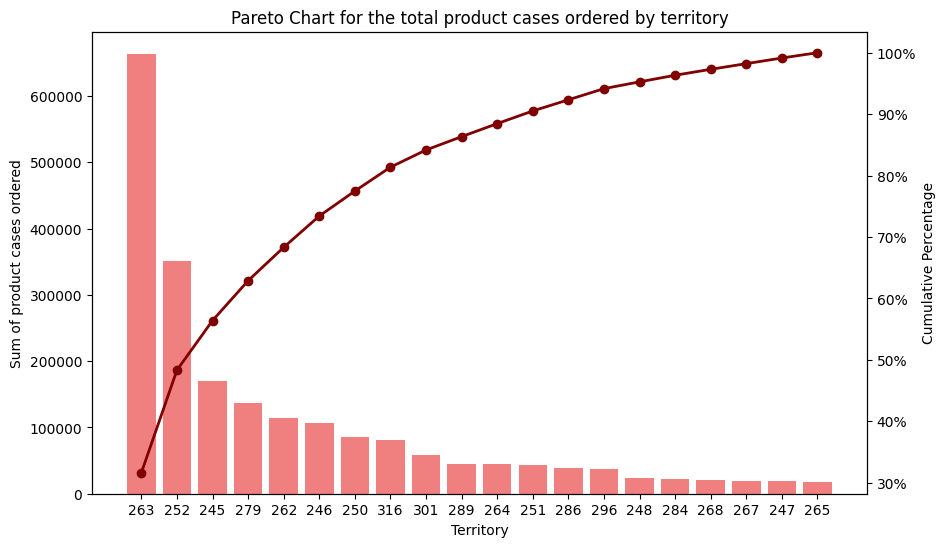

In [9]:
#Plot a Pareto Chart of the total produc cases ordered by territory
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(pareto_territory['territory'], pareto_territory['product_cases_ordered'], color='lightcoral')
ax1.set_xlabel('Territory')
ax1.set_ylabel('Sum of product cases ordered')
ax1.set_title('Pareto Chart for the total product cases ordered by territory')

ax2 = ax1.twinx()
ax2.plot(pareto_territory['territory'], pareto_territory['Cumulative % of total product ordered'], color='maroon', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.show()

**5. Are there any notable patterns or trends in the productAgrupationID with high sales volume?**

In [10]:
#Data Frame with the producAgrupationID and sum of product cases ordered for each for each one
total_productagrup = Arca_df.groupby('productAgrupationID')['product_cases_ordered'].sum().reset_index()
total_productagrup = total_productagrup.sort_values(by = 'product_cases_ordered', ascending = False).reset_index()
del total_productagrup['index']
display(total_productagrup)

,productAgrupationID,product_cases_ordered
0,1121.0,85874.702
1,1104.0,60761.905
2,1123.0,54023.837
3,1103.0,52358.585
4,1202.0,50866.931
5,1431.0,46880.386
6,1112.0,45028.612
7,1117.0,42809.549
8,1427.0,39364.333
9,1091.0,38384.364


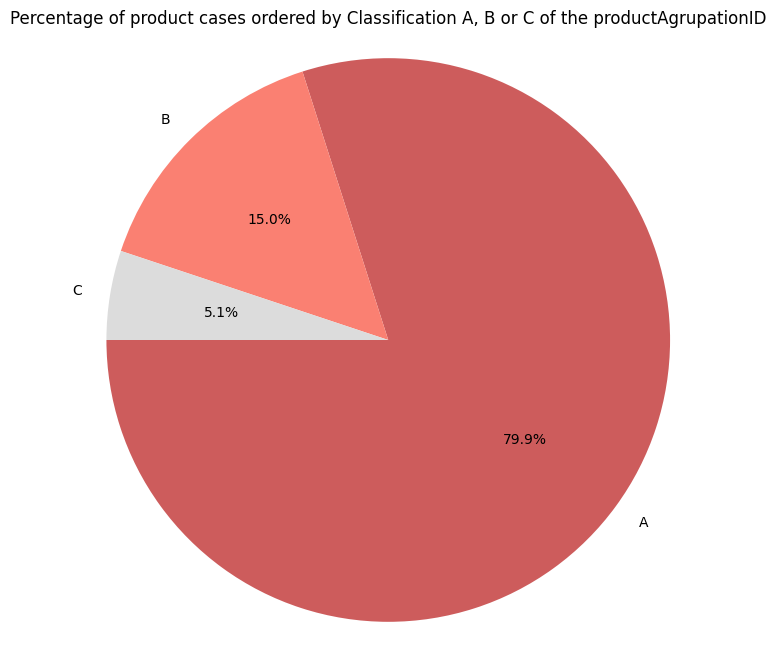

Using a Pareto Analysis, the data shows that 33% of the product agrupations made the 80% of the sale


In [11]:
#Pareto clasification function, divides the data in three categories
def pareto_ABC(row):
  if row['Cumulative % of total product ordered'] <= 80:
    return 'A'
  elif row['Cumulative % of total product ordered'] <= 95:
    return 'B'
  else:
    return 'C'

#Creation of a data frame with the cumulative % for a Pareto classification
total_productagrup['Cumulative % of total product ordered'] = (total_productagrup['product_cases_ordered'].cumsum()/total_productagrup['product_cases_ordered'].sum())*100
total_productagrup['Pareto Classification'] = total_productagrup.apply(pareto_ABC, axis = 1)

pareto_sum = total_productagrup.groupby('Pareto Classification')['product_cases_ordered'].sum().reset_index()

pareto_acumulative = total_productagrup.groupby('Pareto Classification')['Cumulative % of total product ordered'].max().reset_index()
Pareto_A = (total_productagrup['Pareto Classification'] == 'A').mean() * 100

#Plot a pie chart with the percentage of the total product ordered by Pareto Classification
ABC_color = ['indianred','salmon','gainsboro']
plt.figure(figsize=(8, 8))
plt.pie(pareto_sum['product_cases_ordered'], labels= pareto_sum['Pareto Classification'], autopct= '%1.1f%%', startangle= 180, colors = ABC_color)
plt.title('Percentage of product cases ordered by Classification A, B or C of the productAgrupationID')
plt.axis('equal')
plt.show()

print(f'Using a Pareto Analysis, the data shows that {Pareto_A:.0f}% of the product agrupations made the 80% of the sale')

In [12]:
#Data Frame with the territory data and sum of customers for each one
cant_customer = Arca_df.groupby(['territory'])['customer'].nunique().reset_index()
cant_customer = cant_customer.sort_values(by = 'customer', ascending = False)
cant_customer = cant_customer.rename(columns={'customer': 'cant_customers'})
display(cant_customer)

,territory,cant_customers
8,263,32
6,252,16
0,245,8
13,279,7
1,246,5
7,262,5
19,316,4
4,250,4
18,301,3
5,251,2


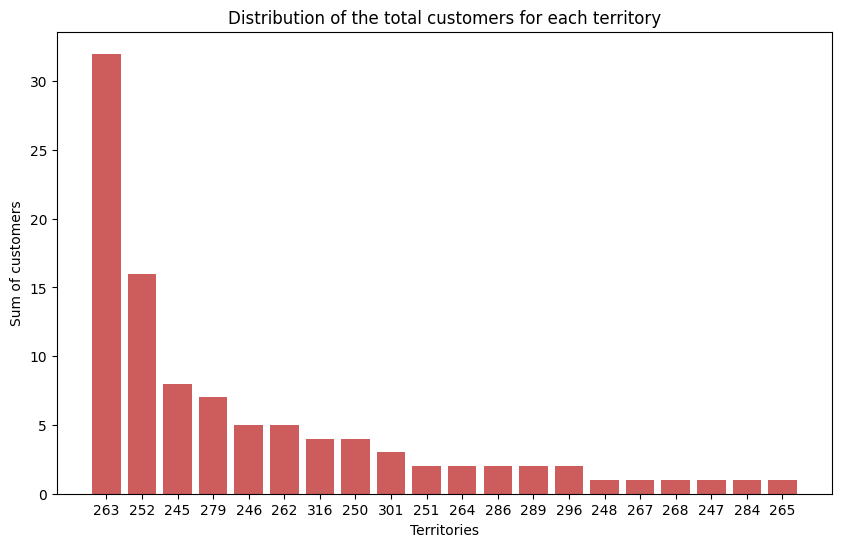

The Pareto law is a consequence of the fact that the territories with the highest number of clients and those with the most orders are the same.


In [13]:
cant_customer['territory'] = cant_customer['territory'].astype(str)
#Plot a bar chart of the total of customers in each territory
plt.figure(figsize=(10, 6))
plt.bar(cant_customer['territory'], cant_customer['cant_customers'], color='indianred')
plt.xlabel('Territories')
plt.ylabel('Sum of customers')
plt.title('Distribution of the total customers for each territory')
plt.show()
print('The Pareto law is a consequence of the fact that the territories with the highest number of clients and those with the most orders are the same.')

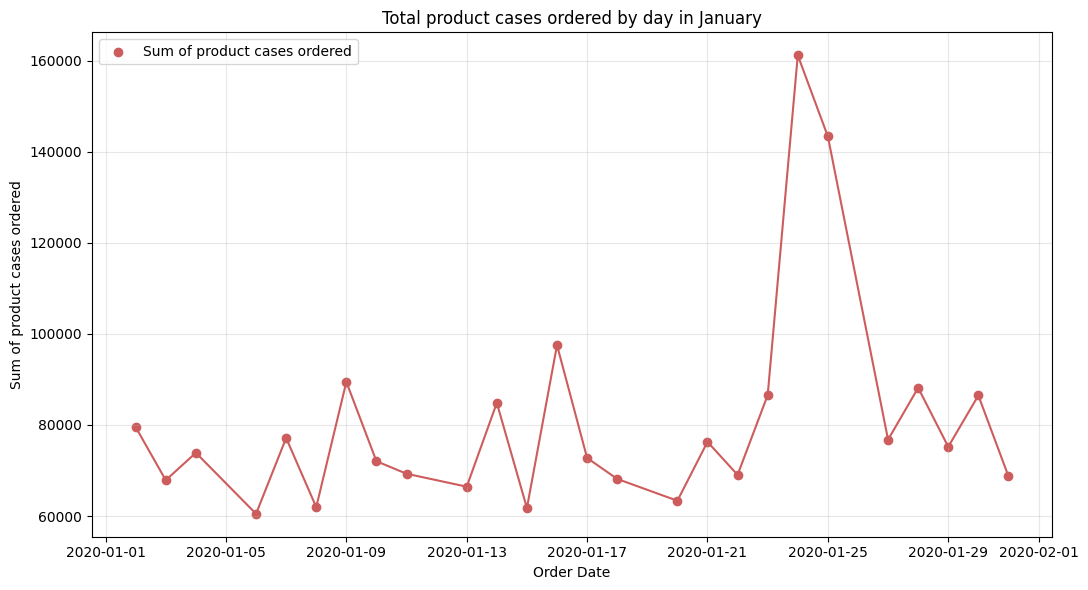

In [14]:
#Make a ata Frame with the sum of the product cases ordered and the date
Arca_df['order_date'] = pd.to_datetime(Arca_df['order_date'])
date_orders = Arca_df.groupby('order_date')['product_cases_ordered'].sum().reset_index()

#Plot the total product cases ordered by day
plt.figure(figsize=(11, 6))
plt.scatter(date_orders['order_date'], date_orders['product_cases_ordered'], marker='o', linestyle='-', color='indianred', label='Sum of product cases ordered')
plt.plot(date_orders['order_date'], date_orders['product_cases_ordered'], color='indianred', linestyle='-')

plt.xlabel('Order Date')
plt.ylabel('Sum of product cases ordered')
plt.title('Total product cases ordered by day in January')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
max_date = date_orders.sort_values(by = 'product_cases_ordered', ascending = False)
display(max_date.head(1))
print('It is impossible to assume seasonal trends because the time span of the data')

,order_date,product_cases_ordered
19,2020-01-24 00:00:00+00:00,161225.972


It is impossible to assume seasonal trends because the time span of the data
